In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
rev_df=pd.read_csv(r'C:\Users\saady\Documents\PROJECTS\Sentiment Analysis\Reviews.csv')
print(rev_df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
rev_df.isna().sum().sort_values()

Id                         0
ProductId                  0
UserId                     0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Text                       0
ProfileName               16
Summary                   27
dtype: int64

EDA


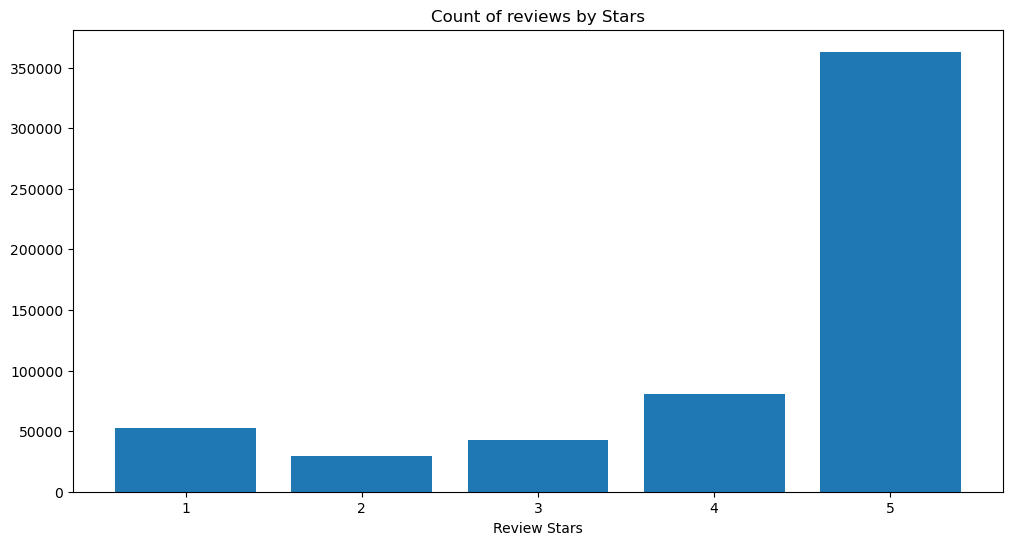

In [5]:
scores=rev_df['Score'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(scores.index,scores.values)
plt.title('Count of reviews by Stars')
plt.xlabel('Review Stars')
plt.show()

In [6]:
example=rev_df['Text'][50
                       ]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saady\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saady\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\saady\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\saady\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saady\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [10]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


**1ère étape: Vader Sentiment Scoring**

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sent=SentimentIntensityAnalyzer()

In [12]:
sent.polarity_scores('I am engaged, i want to suicide and io hate my life')

{'neg': 0.451, 'neu': 0.33, 'pos': 0.22, 'compound': -0.7351}

In [13]:
sent.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [14]:
res={}
for i,row in tqdm(rev_df.iterrows()):
    text=row['Text']
    myid=row['Id']
    res[myid]=sent.polarity_scores(text)


0it [00:00, ?it/s]

In [15]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(rev_df,how='left')

In [16]:
print(vaders.head())

   Id    neg    neu    pos  compound   ProductId          UserId  \
0   1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1   2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                

In [17]:
print(vaders['compound'].min())

-0.9994


In [ ]:
plt.bar(vaders['Score'], vaders['compound'])
plt.title('Compound score by Amazon Star review')
plt.ylim(-1, 1)
plt.show()

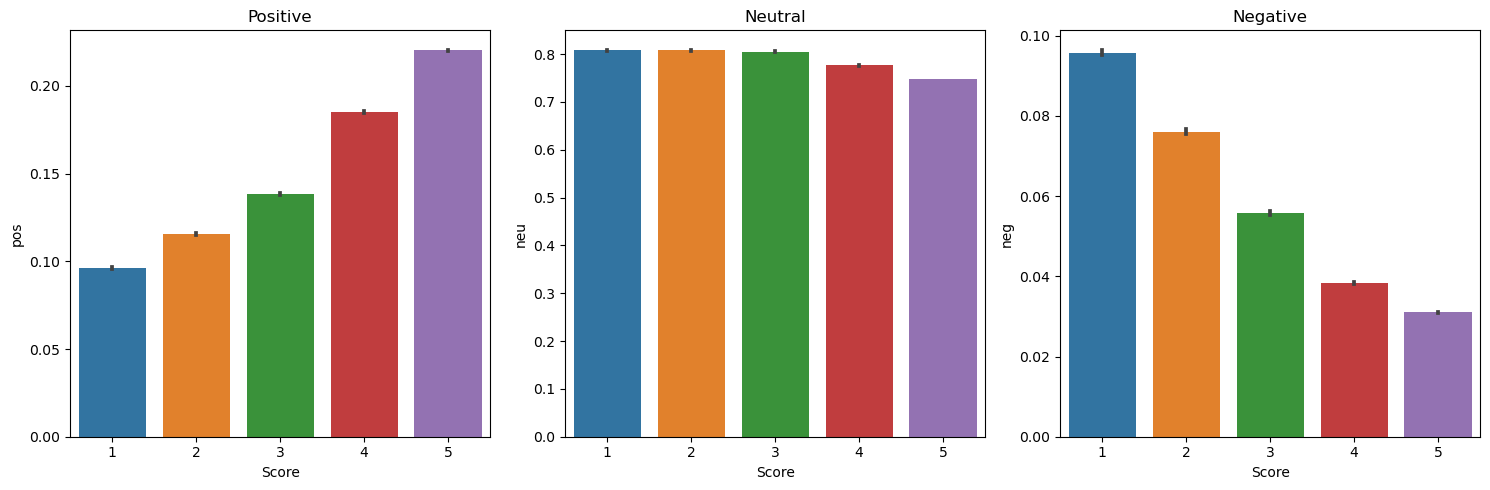

In [63]:
fix,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**Utilisation du transformer **Roberta****

In [25]:
from transformers import AutoTokenizer, AutoConfig
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
encoded_input=tokenizer(example,return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}


In [24]:
output=model(**encoded_input)
scores=output[0][0].detach().numpy()
scores=softmax(scores)

In [27]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) negative 0.9535
2) neutral 0.0409
3) positive 0.0056


**Combiner et comparer les modèles**

In [28]:
def polarity_scores_roberta(example):
    encoded_input=tokenizer(example,return_tensors='pt')
    output=model(**encoded_input)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]    }
    return scores_dict

In [33]:
res={}
rev_df=rev_df.sample(n=7500)
for i,row in tqdm(rev_df.iterrows()):
    try:
        text=row['Text']
        myid=row['Id']
        vader_result=sent.polarity_scores(text)
        vader_result_new={}
        for key,value in vader_result.items():
            vader_result_new[f"vader_{key}"]=value
        roberta_result=polarity_scores_roberta(text)
        both={**vader_result_new,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f"Broke for id {myid}")

0it [00:00, ?it/s]

Broke for id 525687
Broke for id 270314
Broke for id 340809
Broke for id 130207
Broke for id 165921
Broke for id 96833
Broke for id 81990
Broke for id 244576
Broke for id 169571
Broke for id 221976
Broke for id 541451
Broke for id 349536
Broke for id 284792
Broke for id 244705
Broke for id 179886
Broke for id 130136
Broke for id 93433
Broke for id 170648
Broke for id 221281
Broke for id 146414
Broke for id 278071
Broke for id 381481
Broke for id 157064
Broke for id 537688
Broke for id 48136
Broke for id 334473
Broke for id 6886
Broke for id 529632
Broke for id 542957
Broke for id 195701
Broke for id 307322
Broke for id 354456
Broke for id 84164
Broke for id 255837
Broke for id 446923
Broke for id 561002
Broke for id 547227
Broke for id 318932
Broke for id 89561
Broke for id 273516
Broke for id 189342
Broke for id 224196
Broke for id 238871
Broke for id 502798
Broke for id 516308
Broke for id 317586
Broke for id 74281
Broke for id 367847
Broke for id 136691
Broke for id 227682
Broke for

In [34]:
sentiment_results=pd.DataFrame(res).T
sentiment_results=sentiment_results.reset_index().rename(columns={'index':'Id'})
sentiment_results=sentiment_results.merge(rev_df,how='left')

In [35]:
sentiment_results.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,377513,0.034,0.681,0.285,0.9841,0.003175,0.016184,0.980640,B00975HC9G,A3PR3ZEVR9YG3S,"Morgannin ""Eco-friendly mom""",2,2,5,1326326400,Awesome!,This is an awesome product from an awesome com...
1,13267,0.231,0.628,0.141,-0.4873,0.522544,0.351553,0.125903,B004OLKF60,A33WX0DNKQ39NW,"Michael A. Wittie ""Michael""",0,1,3,1314835200,3- Out of 5,"Not bad, and perfectly drinkable, but bland wi..."
2,34651,0.035,0.735,0.230,0.9217,0.007953,0.097134,0.894913,B001EQ582E,A117B5HMGEXOHA,Culinary Cat,0,0,5,1347235200,Serious Kitchen Must Have.,If your passion resides in the kitchen.If how ...
3,214715,0.040,0.650,0.311,0.9435,0.006756,0.028317,0.964927,B001KQAR24,AB0VX6D37FZWT,"Intense4life ""Intense4life""",1,1,5,1284595200,No place else,This is the best price for hemp seed. I have ...
4,36037,0.000,0.609,0.391,0.8979,0.003493,0.011812,0.984695,B001ACMCNA,A2U4Z4NU39Q950,Yvonne Thompson,0,0,5,1341446400,Great taste,First time we have used Chebe produce. We lov...


In [36]:
sentiment_results.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

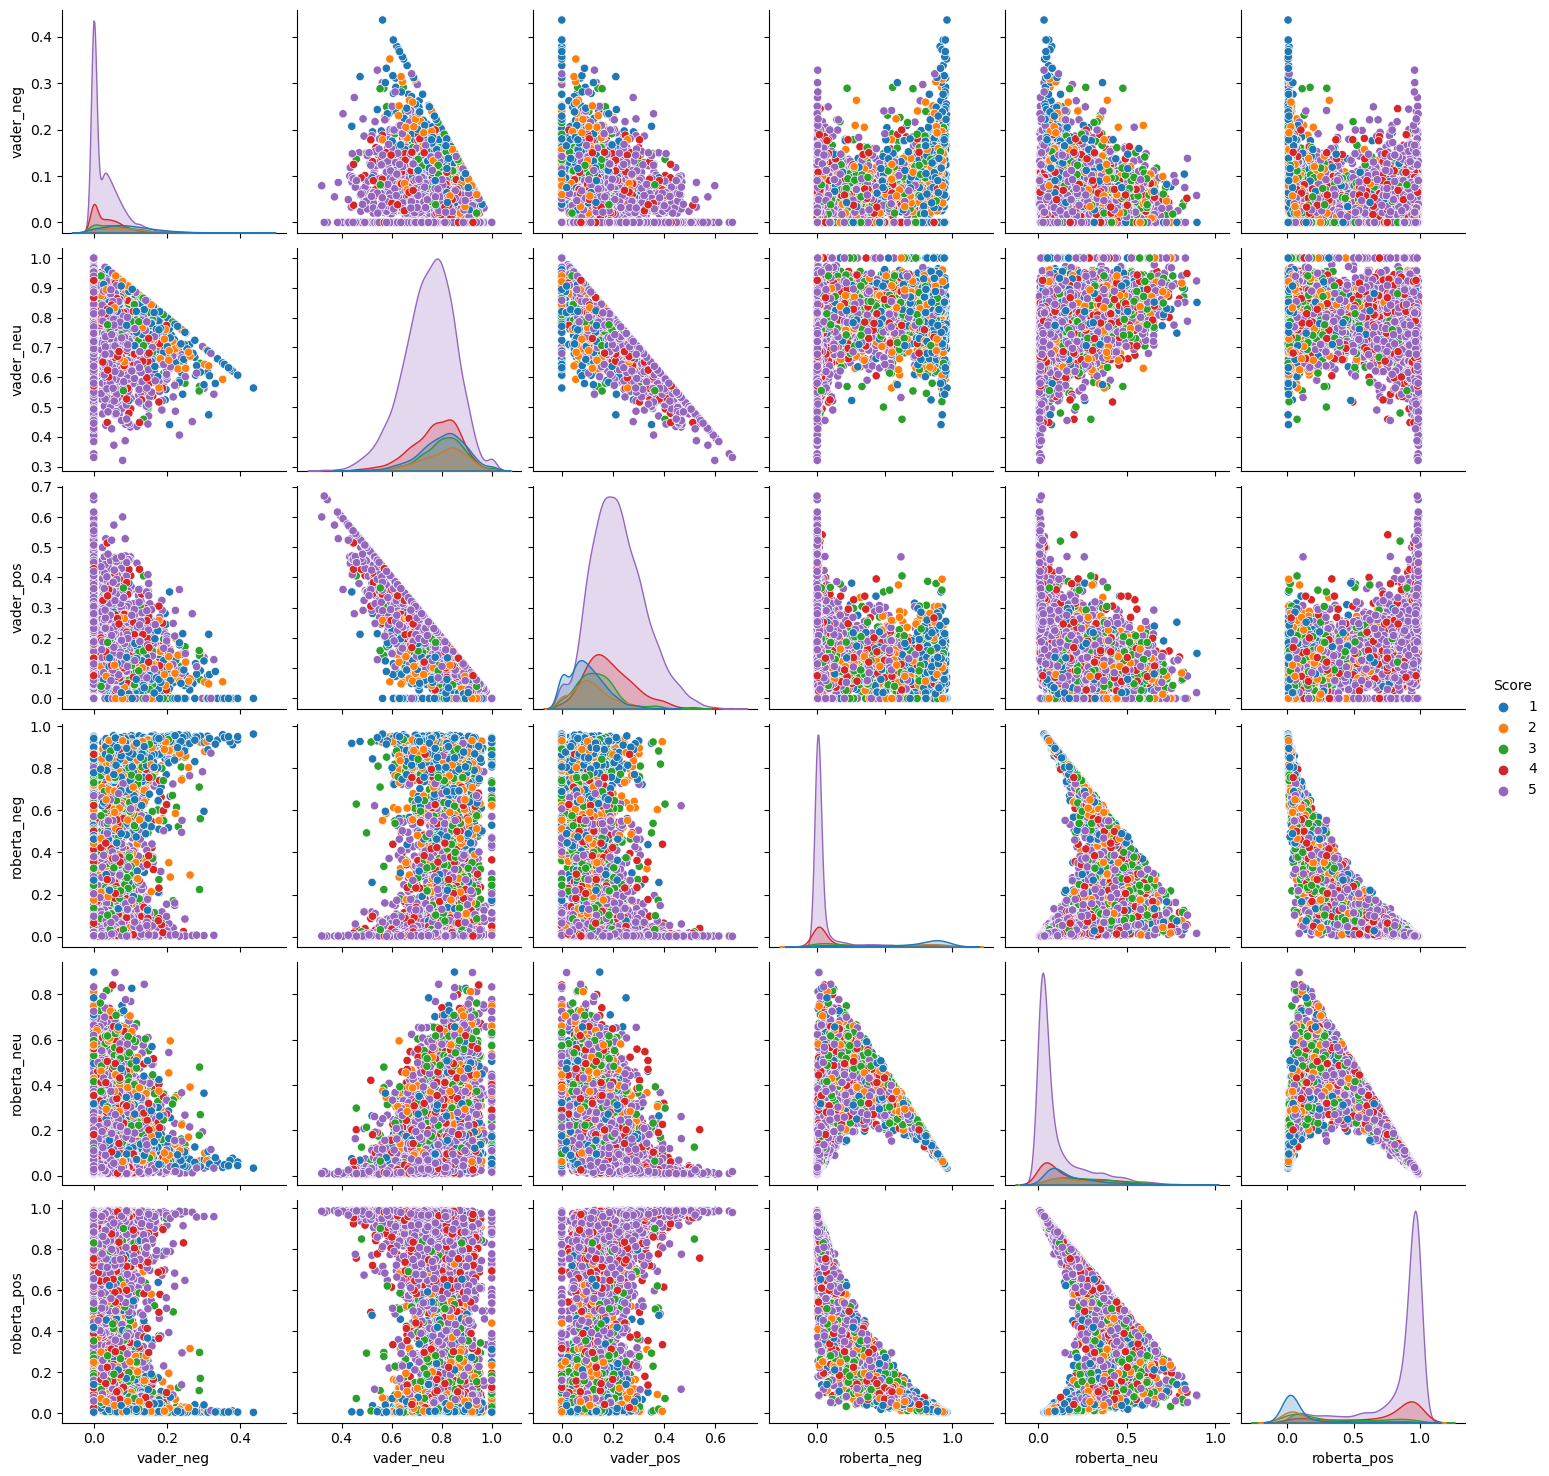

In [38]:
sns.pairplot(data=sentiment_results, vars=['vader_neg', 'vader_neu', 'vader_pos', 
       'roberta_neg', 'roberta_neu', 'roberta_pos'],hue='Score',palette='tab10')
plt.show()

**Vérification de quelques exemples**

In [44]:
sentiment_results.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[0]

'great product but you can easily buy for well under $2.50 at many grocery stores'

In [46]:
sentiment_results.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'Kids love them.  They taste close to regular gumballs but no worry about teeth.'

In [48]:
pip install streamlit

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 8.7/8.7 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 658.1/658.1 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 207.3/207.3 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 25.1/25.1 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 6.9/6.9 MB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 241.6/241.6 kB 4.9 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
   ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
   ---------------------------------------- 87.5/87.5 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 167.7/167.7 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 1.2/1.2 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_exten

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
dataprep 0.4.5 requires flask<3,>=2, but you have flask 3.0.3 which is incompatible.
dataprep 0.4.5 requires jinja2<3.1,>=3.0, but you have jinja2 3.1.4 which is incompatible.
dataprep 0.4.5 requires pydot<2.0.0,>=1.4.2, but you have pydot 2.0.0 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.5 which is incompatible.


In [49]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [50]:
import joblib as jb

In [51]:
jb.dump(model,'Sentiment_analysis.pkl')
jb.dump(tokenizer,'tokenizer.pkl')

['tokenizer.pkl']